In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice


# Readying Sample

In [ ]:
cat_use = make_cat_use()


In [ ]:
mask_nonan = np.isfinite(cat_use.color('f182m', 'f212n')) & np.isfinite(cat_use.color('f182m', 'f410m')) & np.isfinite(cat_use.color('f405n', 'f466n')) & np.isfinite(cat_use.band('f187n')) & np.isfinite(cat_use.band('f182m')) & np.isfinite(cat_use.band('f212n')) & np.isfinite(cat_use.band('f405n')) & np.isfinite(cat_use.band('f410m')) & np.isfinite(cat_use.band('f466n'))
cat_nonan = JWSTCatalog(cat_use.catalog[mask_nonan])

cat_samp_columns = ['ra', 'dec', 'f187n', 'f182m', 'f212n', 'f405n', 'f410m', 'f466n', 'f182m-f212n', 'f182m-f410m', 'f405n-f466n']
cat_samp = np.array([cat_nonan.ra, cat_nonan.dec, cat_nonan.band('f187n'), cat_nonan.band('f182m'), cat_nonan.band('f212n'), cat_nonan.band('f405n'), cat_nonan.band('f410m'), cat_nonan.band('f466n'), cat_nonan.color('f182m', 'f212n'), cat_nonan.color('f182m', 'f410m'), cat_nonan.color('f405n', 'f466n')]).T
cat_samp.shape

(34519, 11)

(0.0, 3.0)

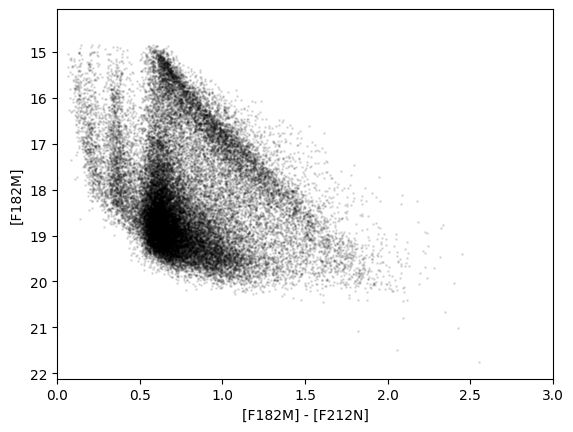

In [ ]:
cat_nonan.plot_CMD('f182m', 'f212n', 'f182m', s=1, color='k', alpha=0.1)
plt.xlim(0, 3)

# KMeans

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

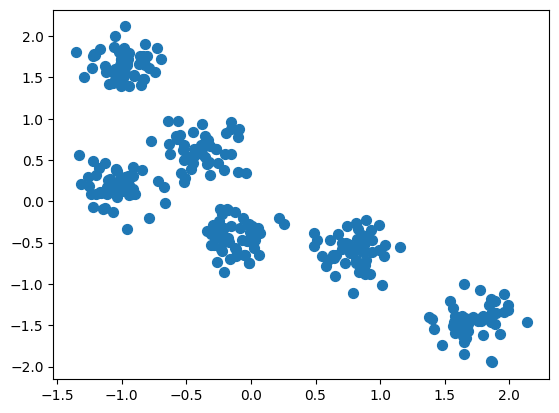

In [ ]:
X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

In [ ]:
X.shape

(300, 2)

In [ ]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on the inertia
model = KMeans(n_clusters=6, n_init = 10)

In [ ]:
labels = model.fit_predict(X)
labels

array([3, 0, 2, 2, 5, 3, 2, 4, 3, 2, 0, 0, 4, 1, 3, 4, 4, 0, 5, 1, 0, 1,
       4, 2, 1, 4, 3, 5, 1, 1, 3, 0, 4, 0, 5, 2, 5, 2, 1, 5, 4, 1, 4, 5,
       0, 0, 0, 3, 3, 3, 2, 1, 3, 1, 0, 3, 1, 3, 0, 1, 0, 5, 5, 1, 2, 0,
       2, 0, 1, 3, 3, 1, 5, 1, 0, 2, 5, 2, 1, 4, 0, 2, 3, 4, 0, 0, 1, 5,
       0, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0, 5, 4, 2, 0, 4, 3, 3, 5, 1, 3, 4,
       1, 5, 5, 1, 4, 1, 2, 5, 5, 5, 4, 2, 1, 5, 5, 2, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 1, 3, 5, 0, 2, 1, 0, 4, 0, 0, 2, 4, 2, 4, 1, 2,
       4, 0, 2, 1, 4, 0, 4, 3, 2, 0, 2, 3, 4, 2, 4, 4, 3, 5, 1, 2, 4, 5,
       5, 4, 0, 3, 4, 2, 1, 3, 3, 4, 1, 5, 4, 1, 2, 5, 4, 4, 4, 3, 0, 1,
       4, 0, 4, 5, 1, 1, 2, 5, 1, 4, 5, 2, 3, 2, 4, 0, 1, 2, 5, 0, 5, 1,
       4, 4, 2, 1, 1, 3, 3, 4, 0, 3, 5, 1, 3, 1, 4, 2, 2, 5, 4, 0, 4, 3,
       1, 4, 2, 3, 2, 0, 2, 5, 4, 3, 0, 0, 2, 0, 1, 5, 3, 5, 1, 2, 5, 3,
       0, 4, 4, 2, 5, 2, 2, 4, 2, 5, 3, 3, 1, 1, 4, 5, 5, 5, 5, 0, 2, 3,
       5, 4, 3, 3, 3, 2, 1, 0, 5, 3, 3, 0, 0, 2], d

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
centroids = model.cluster_centers_


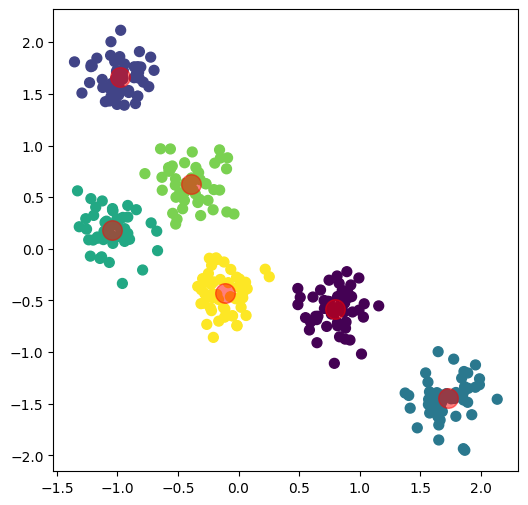

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

#plt.savefig('clusters.png', dpi=300, transparent=True)

In [ ]:
model.inertia_

16.840104353258873

## Applying to Data

In [ ]:
cat_model = KMeans(n_clusters=10, n_init = 10)

In [ ]:
cat_labels = cat_model.fit_predict(cat_samp)

In [ ]:
cat_centroids = cat_model.cluster_centers_

In [ ]:
cat_samp_columns

['ra',
 'dec',
 'f187n',
 'f182m',
 'f212n',
 'f405n',
 'f410m',
 'f466n',
 'f182m-f212n',
 'f182m-f410m',
 'f405n-f466n']

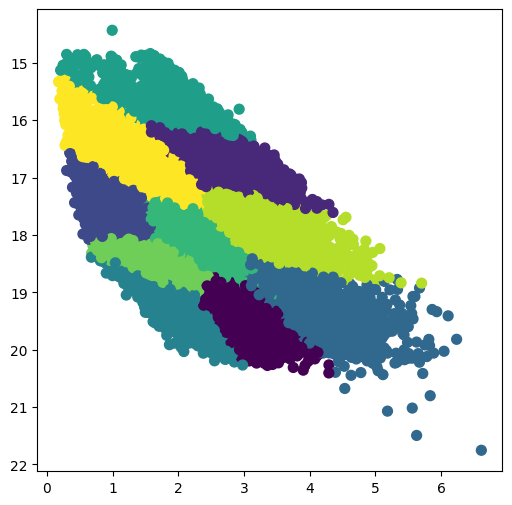

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, 3], c=cat_labels, s=50, cmap='viridis')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)

# Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=6, n_init=10, random_state=0)
model.fit(X)

GaussianMixture(n_components=6, n_init=10, random_state=0)

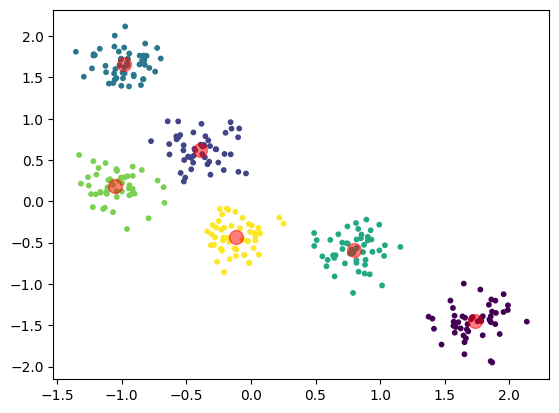

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=10, cmap='viridis')

plt.scatter(model.means_[:, 0], model.means_[:, 1], c='red', s=100, alpha=0.5)

## Applying to Data

In [ ]:
cat_model = GaussianMixture(n_components=6, n_init=20, random_state=0)

In [ ]:
cat_model.fit(cat_samp)

GaussianMixture(n_components=6, n_init=20, random_state=0)

Text(0, 0.5, 'f182m')

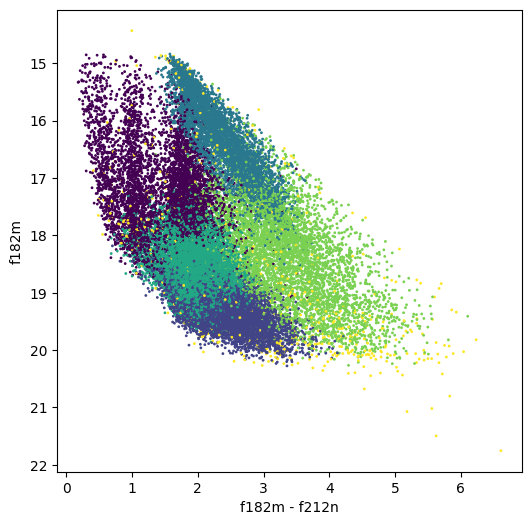

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, 3], c=cat_model.predict(cat_samp), s=1, cmap='viridis')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f182m')

In [ ]:
cat_samp_columns

['ra',
 'dec',
 'f187n',
 'f182m',
 'f212n',
 'f405n',
 'f410m',
 'f466n',
 'f182m-f212n',
 'f182m-f410m',
 'f405n-f466n']

(-2.5, 1.0)

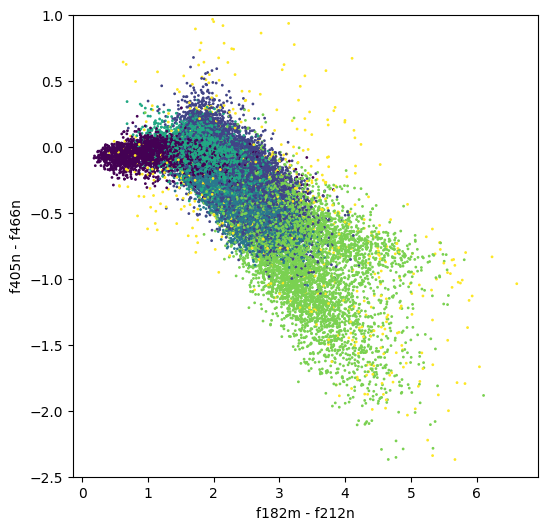

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, -1], c=cat_model.predict(cat_samp), s=1, cmap='viridis')

#plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f405n - f466n')
plt.ylim(-2.5, 1)

Text(0, 0.5, 'dec')

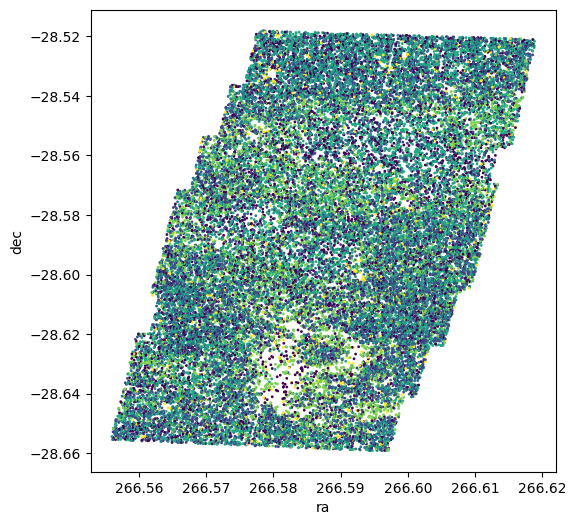

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 0], cat_samp[:, 1], c=cat_model.predict(cat_samp), s=1, cmap='viridis')

#plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('ra')
plt.ylabel('dec')